In [1]:
import matplotlib.pyplot as plt
from numpy import zeros, arange, linspace, pi, cos, sin, sqrt, array, log10, amax, linspace, log10, unwrap, angle, exp
from numpy.random import normal as noise_gaussian
from pathlib import Path
from os import listdir
from os.path import splitext
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import TransferFunction, bode, butter, filtfilt, freqs
from multiprocessing.pool import ThreadPool
from time import process_time
from math import ceil, log
%matplotlib widget

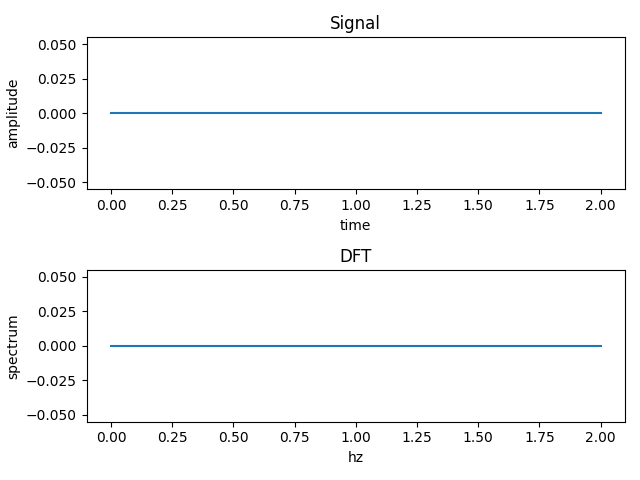

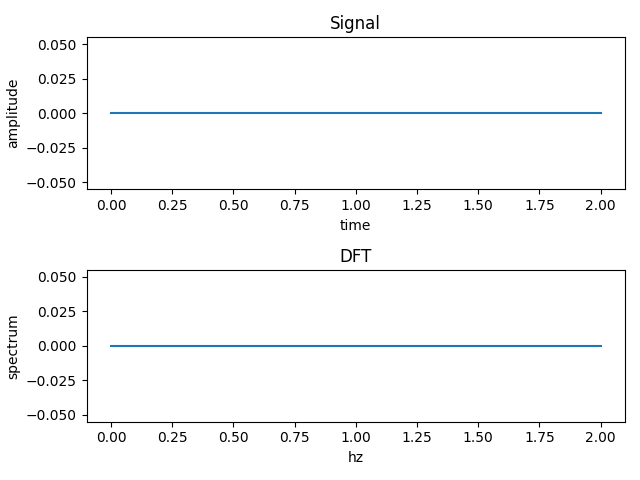

In [2]:
texts_0 = [[], [], []] # X(sequence) and Y(ecg signal) value

def dft(data):
    length = len(data)
    amplitude_dft = []
    for i in range(length):
        temp = 0
        for j in range(length):
            temp += data[j]*exp(-2j*pi*i*j/length)
        amplitude_dft += [abs(temp)/length]
    return amplitude_dft
    

########################
opening_select_signal = widgets.Text(value='Please select signal.', 
                       disabled=True)
files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".txt":
        temp.append(file)
files = temp
select_signal = widgets.Select(
    options=files,
    description='Select First File:',
    disabled=False
)

########################
button_select_signal = widgets.Button(description='Select Signal')
def on_button_select_signal_clicked(change):
    frequency_sampling = select_frequency_sampling.get_interact_value()
    length = select_signal_length.get_interact_value()
    
    with open(select_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    try:
        temp = [(x.replace("\n", "")).split() for x in text_file]
        texts_0[0] = [float(x[0]) for x in temp]
        texts_0[1] = [float(x[1]) for x in temp]
        # texts_0[2] = [float(x[2]) for x in temp[2:]]
        if length <= len(texts_0[0]):
            texts_0[0] = texts_0[0][:length]
            texts_0[1] = texts_0[1][:length]
            # texts_0[2] = texts_0[2][:length]
    except ValueError:
        print("Please select double column text file. File Read Error!")
        return    
    
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    async_result_0 = pool.apply_async(dft, (texts_0[1],))
    # async_result_1 = pool.apply_async(dft, (texts_0[1],))
    dft_result_0 = async_result_0.get()
    # dft_result_1 = async_result_1.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax[0].set_xlim([0, max(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(linspace(0, frequency_sampling, len(texts_0[0])), dft_result_0)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result_0), max(dft_result_0)])
        
    # with out_1:
    #     plot_2.set_data(texts_0[0], texts_0[2])
    #     fig_1_ax[0].set_xlim([0, max(texts_0[0])])
    #     fig_1_ax[0].set_ylim([min(texts_0[2]), max(texts_0[2])])
    #     plot_3.set_data(linspace(0, frequency_sampling, len(texts_0[0])), dft_result_1)
    #     fig_1_ax[1].set_xlim([0, frequency_sampling//2])
    #     fig_1_ax[1].set_ylim([min(dft_result_1), max(dft_result_1)])
    
    with out_2:
        print("{} second".format(elapsed_time_0))
        
button_select_signal.on_click(on_button_select_signal_clicked)

########################
opening_sinus_signal = widgets.Text(value='Please input variables.', 
                       disabled=True)
select_signal_length = widgets.IntText(
    value=512,
    description='n:',
    disabled=False
)
select_frequency_sampling = widgets.IntText(
    value=256,
    description='fs:',
    disabled=False
)

########################
text_signal = widgets.Text(value='First Sinus Signal.', disabled=True)
select_offset = widgets.IntText(
    value=3,
    description='A:',
    disabled=False
)
select_frequency_signal = widgets.FloatText(
    value=0.25,
    step=0.01,
    description='f:',
    disabled=False
)
select_amplitude_signal = widgets.IntText(
    value=5,
    description='A:',
    disabled=False
)


########################
button_sinus_signal = widgets.Button(description='Select Signal')
def on_button_sinus_signal_clicked(change):
    length = select_signal_length.get_interact_value()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    offset = select_offset.get_interact_value()
    frequency_signal = select_frequency_signal.get_interact_value()
    amplitude_signal = select_amplitude_signal.get_interact_value()
     
    pool = ThreadPool(processes=8)
    t_0 = process_time()
    time = length/frequency_sampling
    texts_0[0] = linspace(0, time, length)
    texts_0[1] = [offset + x*amplitude_signal for x in sin(linspace(0, 2*pi*frequency_signal, length))]
    async_result_0 = pool.apply_async(dft, (texts_0[1],))
    dft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
     
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax[0].set_xlim([0, max(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(arange(length), dft_result)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result), max(dft_result)])
        
    with out_3:
        print("{} second".format(elapsed_time_0))
button_sinus_signal.on_click(on_button_sinus_signal_clicked)

########################
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=2, ncols=1)
    fig_0_ax[0].set(xlabel="time", ylabel="amplitude", title="Signal")
    fig_0_ax[1].set(xlabel="hz", ylabel="spectrum", title="DFT")
    plot_0, = fig_0_ax[0].plot([0,1,2], [0,0,0])
    plot_1, = fig_0_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()

########################
out_1 = widgets.Output()
with out_1:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=2, ncols=1)
    fig_1_ax[0].set(xlabel="time", ylabel="amplitude", title="Signal")
    fig_1_ax[1].set(xlabel="hz", ylabel="spectrum", title="DFT")
    plot_2, = fig_1_ax[0].plot([0,1,2], [0,0,0])
    plot_3, = fig_1_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
    
out_2 = widgets.Output()
out_3 = widgets.Output()
    
    
horizontal_box_0 = widgets.HBox([button_select_signal, out_2])
horizontal_box_1 = widgets.HBox([button_sinus_signal, out_3])
vertical_box_0 = widgets.VBox([opening_select_signal, 
                               select_signal_length,
                               select_frequency_sampling,
                               select_signal, 
                               horizontal_box_0])
vertical_box_1 = widgets.VBox([opening_sinus_signal,
                               select_signal_length,
                               select_frequency_sampling,
                               text_signal,
                               select_offset,
                               select_frequency_signal,
                               select_amplitude_signal,
                               horizontal_box_1])
horizontal_box_2 = widgets.HBox([vertical_box_0, vertical_box_1])
horizontal_box_3 = widgets.HBox([out_0, out_1])
display(horizontal_box_2, horizontal_box_3)


In [ ]:
texts_0 = [[], [], []] # X(sequence) and Y(ecg signal) value

def b_rvs(data):
    length = len(data)
    data_even = []
    data_odd = []
    
    if length <= 1:
        return data
    else:
        for i in range(int(length / 2)):
            data_even += [data[2 * i]]
            data_odd += [data[(2 * i) + 1]]
        return b_rvs(data_even) + b_rvs(data_odd)
    
def padding(data_1):
    length = len(data_1)
    alpha = ceil(log(length) / log(2))
    while length < (2**alpha):
        data_1.append(0)
        length += 1
    length = len(data_1)  
    return data_1

def fft(data):
    data = padding(data) 
    length = len(data)
    alpha = ceil(log(length) / log(2))
    lim1 = length - 1
    data_real = b_rvs(data)
    data_im = zeros(len(data_real))
    for i in range(1, int(alpha) + 1):
        k = 2**i
        k2 = int(k / 2)
        ur = 1
        ui = 0
        wr = float(cos(pi / k2))
        wi = -float(sin(pi / k2))
        for j in range(1, k2 + 1):
            j1 = j - 1
            for m in range(j1, lim1 + 1, k):
                m2 = m + k2
                tr = float((data_real[m2] * ur) - (data_im[m2] * ui))
                ti = float((data_real[m2] * ui) + (data_im[m2] * ur))
                data_real[m2] = float(data_real[m] - tr)
                data_im[m2] = float(data_im[m] - ti)
                data_real[m] = float(data_real[m] + tr)
                data_im[m] = float(data_im[m] + ti)
            tr = float(ur)
            ur = float((tr*wr) - (ui*wi))
            ui = float((tr*wi) + (ui*wr))
    amplitude_fft = []
    for i in range(length):
        amplitude_fft += [(sqrt((data_real[i]**2) + data_im[i]**2)) / length]
    return amplitude_fft    

########################
opening_select_signal = widgets.Text(value='Please select signal.', 
                       disabled=True)
files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".dat":
        temp.append(file)
files = temp
select_signal = widgets.Select(
    options=files,
    description='Select First File:',
    disabled=False
)

########################
button_select_signal = widgets.Button(description='Select Signal')
def on_button_select_signal_clicked(change):
    frequency_sampling = select_frequency_sampling.get_interact_value()
    length = select_signal_length.get_interact_value()
    time = length/frequency_sampling
    
    with open(select_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    try:
        temp = [(x.replace("\n", "")).split() for x in text_file]
        texts_0[0] = [float(x[0]) for x in temp[2:]]
        texts_0[1] = [float(x[1]) for x in temp[2:]]
        texts_0[2] = [float(x[2]) for x in temp[2:]]
        if length < len(texts_0[0]):
            texts_0[0] = linspace(0, time, 2**(ceil(log(length) / log(2))))
            texts_0[1] = texts_0[1][:length]
            texts_0[2] = texts_0[2][:length]
            
        else:
            texts_0[0] = linspace(0, time, 2**(ceil(log(length) / log(2))))
            texts_0[1] = padding(texts_0[1][:length])
            texts_0[2] = padding(texts_0[2][:length])
    except ValueError:
        print("Please select double column text file. File Read Error!")
        return      
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    async_result_0 = pool.apply_async(fft, (texts_0[1],))
    async_result_1 = pool.apply_async(fft, (texts_0[2],))
    fft_result_0 = async_result_0.get()
    fft_result_1 = async_result_1.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(texts_0[0], padding(texts_0[1]))
        fig_0_ax[0].set_xlim([0, max(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(linspace(0, frequency_sampling, len(fft_result_0)), fft_result_0)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(fft_result_0), max(fft_result_0)])
        
    with out_1:
        plot_2.set_data(texts_0[0], texts_0[2])
        fig_1_ax[0].set_xlim([0, max(texts_0[0])])
        fig_1_ax[0].set_ylim([min(texts_0[2]), max(texts_0[2])])
        plot_3.set_data(linspace(0, frequency_sampling, len(fft_result_1)), fft_result_1)
        fig_1_ax[1].set_xlim([0, frequency_sampling//2])
        fig_1_ax[1].set_ylim([min(fft_result_1), max(fft_result_1)])
    
    with out_2:
        print("{} second".format(elapsed_time_0))
        
button_select_signal.on_click(on_button_select_signal_clicked)

########################
opening_sinus_signal = widgets.Text(value='Please input variables.', 
                       disabled=True)
select_signal_length = widgets.IntText(
    value=512,
    description='n:',
    disabled=False
)
select_frequency_sampling = widgets.IntText(
    value=360,
    description='fs:',
    disabled=False
)

########################
text_signal = widgets.Text(value='First Sinus Signal.', disabled=True)
select_offset = widgets.IntText(
    value=3,
    description='Dc:',
    disabled=False
)
select_frequency_signal = widgets.FloatText(
    value=0.25,
    step=0.01,
    description='f:',
    disabled=False
)
select_amplitude_signal = widgets.IntText(
    value=5,
    description='A:',
    disabled=False
)


########################
button_sinus_signal = widgets.Button(description='Select Signal')
def on_button_sinus_signal_clicked(change):
    length = select_signal_length.get_interact_value()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    offset = select_offset.get_interact_value()
    frequency_signal = select_frequency_signal.get_interact_value()
    amplitude_signal = select_amplitude_signal.get_interact_value()
     
    pool = ThreadPool(processes=8)
    t_0 = process_time()
    time = length/frequency_sampling
    texts_0[0] = linspace(0, time, 2**(ceil(log(length) / log(2))))
    texts_0[1] = [(offset + x*amplitude_signal) for x in sin(linspace(0, 2*pi*frequency_signal, length))]
    async_result_0 = pool.apply_async(fft, (texts_0[1],))
    fft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax[0].set_xlim([0, time])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(arange(len(fft_result)), fft_result)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(fft_result), max(fft_result)])
        
    with out_3:
        print("{} second".format(elapsed_time_0))
button_sinus_signal.on_click(on_button_sinus_signal_clicked)

########################
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=2, ncols=1)
    fig_0_ax[0].set(xlabel="time", ylabel="amplitude", title="Signal")
    fig_0_ax[1].set(xlabel="hz", ylabel="spectrum", title="FFT")
    plot_0, = fig_0_ax[0].plot([0,1,2], [0,0,0])
    plot_1, = fig_0_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()

########################
out_1 = widgets.Output()
with out_1:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=2, ncols=1)
    fig_1_ax[0].set(xlabel="time", ylabel="amplitude", title="Signal")
    fig_1_ax[1].set(xlabel="hz", ylabel="spectrum", title="FFT")
    plot_2, = fig_1_ax[0].plot([0,1,2], [0,0,0])
    plot_3, = fig_1_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
    
out_2 = widgets.Output()
out_3 = widgets.Output()
    
    
horizontal_box_0 = widgets.HBox([button_select_signal, out_2])
horizontal_box_1 = widgets.HBox([button_sinus_signal, out_3])
vertical_box_0 = widgets.VBox([opening_select_signal, 
                               select_signal_length,
                               select_frequency_sampling,
                               select_signal, 
                               horizontal_box_0])
vertical_box_1 = widgets.VBox([opening_sinus_signal,
                               select_signal_length,
                               select_frequency_sampling,
                               text_signal,
                               select_offset,
                               select_frequency_signal,
                               select_amplitude_signal,
                               horizontal_box_1])
horizontal_box_2 = widgets.HBox([vertical_box_0, vertical_box_1])
horizontal_box_3 = widgets.HBox([out_0, out_1])
display(horizontal_box_2, horizontal_box_3)


In [ ]:
texts_0 = [[], [], []] # X(sequence) and Y(ecg signal) value

########################
def dft(data):
    length = len(data)
    amplitude_dft = []
    for i in range(length):
        temp = 0
        for j in range(length):
            temp += data[j]*exp(-2j*pi*i*j/length)
        amplitude_dft += [abs(temp)/length]
    return amplitude_dft

########################
def b_rvs(data):
    length = len(data)
    data_even = []
    data_odd = []
    
    if length <= 1:
        return data
    else:
        for i in range(int(length / 2)):
            data_even += [data[2 * i]]
            data_odd += [data[(2 * i) + 1]]
        return b_rvs(data_even) + b_rvs(data_odd)
    
def padding(data_1):
    length = len(data_1)
    alpha = ceil(log(length) / log(2))
    while length < (2**alpha):
        data_1.append(0)
        length += 1
    length = len(data_1)  
    return data_1

def fft(data):
    data = padding(data) 
    length = len(data)
    alpha = ceil(log(length) / log(2))
    lim1 = length - 1
    data_real = b_rvs(data)
    data_im = zeros(len(data_real))
    for i in range(1, int(alpha) + 1):
        k = 2**i
        k2 = int(k / 2)
        ur = 1
        ui = 0
        wr = float(cos(pi / k2))
        wi = -float(sin(pi / k2))
        for j in range(1, k2 + 1):
            j1 = j - 1
            for m in range(j1, lim1 + 1, k):
                m2 = m + k2
                tr = float((data_real[m2] * ur) - (data_im[m2] * ui))
                ti = float((data_real[m2] * ui) + (data_im[m2] * ur))
                data_real[m2] = float(data_real[m] - tr)
                data_im[m2] = float(data_im[m] - ti)
                data_real[m] = float(data_real[m] + tr)
                data_im[m] = float(data_im[m] + ti)
            tr = float(ur)
            ur = float((tr*wr) - (ui*wi))
            ui = float((tr*wi) + (ui*wr))
    amplitude_fft = []
    for i in range(length):
        amplitude_fft += [(sqrt((data_real[i]**2) + data_im[i]**2)) / length]
    return amplitude_fft    

########################
text_select_signal = widgets.Text(value='Please select signal.', 
                       disabled=True)
select_signal_length = widgets.IntText(
    value=512,
    description='n:',
    disabled=False
)
select_frequency_sampling = widgets.IntText(
    value=360,
    description='fs:',
    disabled=False
)

########################
files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".dat":
        temp.append(file)
files = temp
select_signal = widgets.Select(
    options=files,
    description='Select First File:',
    disabled=False
)

########################
button_select_signal = widgets.Button(description='Select Signal')
def on_button_select_signal_clicked(change):
    frequency_sampling = select_frequency_sampling.get_interact_value()
    length = select_signal_length.get_interact_value()
    time = length/frequency_sampling
    
    with open(select_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    try:
        temp = [(x.replace("\n", "")).split() for x in text_file]
        texts_0[0] = [float(x[0]) for x in temp[2:]]
        texts_0[1] = [float(x[1]) for x in temp[2:]]
        texts_0[2] = [float(x[2]) for x in temp[2:]]
        if length < len(texts_0[0]):
            texts_0[0] = linspace(0, time, 2**(ceil(log(length) / log(2))))
            texts_0[1] = texts_0[1][:length]
            texts_0[2] = texts_0[2][:length]
            
        else:
            texts_0[0] = linspace(0, time, 2**(ceil(log(length) / log(2))))
            texts_0[1] = padding(texts_0[1][:length])
            texts_0[2] = padding(texts_0[2][:length])
    except ValueError:
        print("Please select double column text file. File Read Error!")
        return      
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    async_result_0 = pool.apply_async(fft, (texts_0[1],))
    async_result_1 = pool.apply_async(fft, (texts_0[2],))
    fft_result_0 = async_result_0.get()
    fft_result_1 = async_result_1.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(texts_0[0], padding(texts_0[1]))
        fig_0_ax[0].set_xlim([0, max(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(linspace(0, frequency_sampling, len(fft_result_0)), fft_result_0)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(fft_result_0), max(fft_result_0)])
        
    with out_1:
        plot_2.set_data(texts_0[0], texts_0[2])
        fig_1_ax[0].set_xlim([0, max(texts_0[0])])
        fig_1_ax[0].set_ylim([min(texts_0[2]), max(texts_0[2])])
        plot_3.set_data(linspace(0, frequency_sampling, len(fft_result_1)), fft_result_1)
        fig_1_ax[1].set_xlim([0, frequency_sampling//2])
        fig_1_ax[1].set_ylim([min(fft_result_1), max(fft_result_1)])
    
    with out_2:
        print("{} second".format(elapsed_time_0))     
button_select_signal.on_click(on_button_select_signal_clicked)

########################
text_select_rectangular = widgets.Text(value='Please select rectangular window variables.', 
                       disabled=True)
select_start_rectangular = widgets.IntText(
    value=0,
    description='start:',
    disabled=False
)
select_end_rectangular = widgets.IntText(
    value=100,
    description='stop:',
    disabled=False
)
button_select_rectangular = widgets.Button(description='Show Rectangular Window')
def on_button_select_rectangular_clicked(change):
    frequency_sampling = select_frequency_sampling.get_interact_value()
    length = select_signal_length.get_interact_value()
    time = length/frequency_sampling
    start_rectangular = select_start_rectangular.get_interact_value()
    end_rectangular = select_end_rectangular.get_interact_value()
    data_rectangular = [texts_0[0][start_rectangular : end_rectangular],
                        texts_0[1][start_rectangular : end_rectangular],
                        texts_0[2][start_rectangular : end_rectangular],
                       ]
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    async_result_0 = pool.apply_async(dft, (data_rectangular[1],))
    async_result_1 = pool.apply_async(dft, (data_rectangular[2],))
    dft_result_0 = async_result_0.get()
    dft_result_1 = async_result_1.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(data_rectangular[0], data_rectangular[1])
        fig_0_ax[0].set_xlim([min(data_rectangular[0]), max(data_rectangular[0])])
        fig_0_ax[0].set_ylim([min(data_rectangular[1]), max(data_rectangular[1])])
        plot_1.set_data(linspace(0, frequency_sampling, len(dft_result_0)), dft_result_0)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result_0), max(dft_result_0)])
        
    with out_1:
        plot_2.set_data(data_rectangular[0], data_rectangular[2])
        fig_1_ax[0].set_xlim([min(data_rectangular[0]), max(data_rectangular[0])])
        fig_1_ax[0].set_ylim([min(data_rectangular[2]), max(data_rectangular[2])])
        plot_3.set_data(linspace(0, frequency_sampling, len(dft_result_1)), dft_result_1)
        fig_1_ax[1].set_xlim([0, frequency_sampling//2])
        fig_1_ax[1].set_ylim([min(dft_result_1), max(dft_result_1)])
        
    with out_3:
        print("{} second".format(elapsed_time_0))   
button_select_rectangular.on_click(on_button_select_rectangular_clicked)

########################
text_select_hanning = widgets.Text(value='Please select hanning window variables.', 
                       disabled=True)
select_start_hanning = widgets.IntText(
    value=0,
    description='start:',
    disabled=False
)
select_end_hanning = widgets.IntText(
    value=100,
    description='stop:',
    disabled=False
)
button_select_hanning = widgets.Button(description='Show Hanning Window')
def on_button_select_hanning_clicked(change):
    frequency_sampling = select_frequency_sampling.get_interact_value()
    length = select_signal_length.get_interact_value()
    time = length/frequency_sampling
    start_hanning = select_start_hanning.get_interact_value()
    end_hanning = select_end_hanning.get_interact_value()
    length_hanning = end_hanning - start_hanning
    data_hanning = [texts_0[0][start_hanning : end_hanning],
                        texts_0[1][start_hanning : end_hanning],
                        texts_0[2][start_hanning : end_hanning],
                       ]
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    
    data_hanning[1] = [data_hanning[1][n] * (0.5 - 0.5*cos(2*pi*n / length_hanning)) for n in range(length_hanning)]
    data_hanning[2] = [data_hanning[2][n] * (0.5 - 0.5*cos(2*pi*n / length_hanning)) for n in range(length_hanning)]
    async_result_0 = pool.apply_async(dft, (data_hanning[1],))
    async_result_1 = pool.apply_async(dft, (data_hanning[2],))
    dft_result_0 = async_result_0.get()
    dft_result_1 = async_result_1.get()
    
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(data_hanning[0], data_hanning[1])
        fig_0_ax[0].set_xlim([min(data_hanning[0]), max(data_hanning[0])])
        fig_0_ax[0].set_ylim([min(data_hanning[1]), max(data_hanning[1])])
        plot_1.set_data(linspace(0, frequency_sampling, len(dft_result_0)), dft_result_0)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result_0), max(dft_result_0)])
        
    with out_1:
        plot_2.set_data(data_hanning[0], data_hanning[2])
        fig_1_ax[0].set_xlim([min(data_hanning[0]), max(data_hanning[0])])
        fig_1_ax[0].set_ylim([min(data_hanning[2]), max(data_hanning[2])])
        plot_3.set_data(linspace(0, frequency_sampling, len(dft_result_1)), dft_result_1)
        fig_1_ax[1].set_xlim([0, frequency_sampling//2])
        fig_1_ax[1].set_ylim([min(dft_result_1), max(dft_result_1)])
        
    with out_4:
        print("{} second".format(elapsed_time_0)) 
button_select_hanning.on_click(on_button_select_hanning_clicked)

########################
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=2, ncols=1)
    fig_0_ax[0].set(xlabel="time", ylabel="amplitude", title="Signal")
    fig_0_ax[1].set(xlabel="hz", ylabel="spectrum", title="Fourier Transform")
    plot_0, = fig_0_ax[0].plot([0,1,2], [0,0,0])
    plot_1, = fig_0_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()

########################
out_1 = widgets.Output()
with out_1:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=2, ncols=1)
    fig_1_ax[0].set(xlabel="time", ylabel="amplitude", title="Signal")
    fig_1_ax[1].set(xlabel="hz", ylabel="spectrum", title="Fourier Transform")
    plot_2, = fig_1_ax[0].plot([0,1,2], [0,0,0])
    plot_3, = fig_1_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
    
out_2 = widgets.Output()
out_3 = widgets.Output()
out_4 = widgets.Output()
    
    
horizontal_box_0 = widgets.HBox([button_select_signal, out_2])
horizontal_box_1 = widgets.HBox([button_select_rectangular, out_3])
horizontal_box_2 = widgets.HBox([button_select_hanning, out_4])
vertical_box_0 = widgets.VBox([text_select_signal, 
                               select_signal_length,
                               select_frequency_sampling,
                               select_signal, 
                               horizontal_box_0])
vertical_box_1 = widgets.VBox([text_select_rectangular, 
                               select_start_rectangular,
                               select_end_rectangular,
                               horizontal_box_1])
vertical_box_2 = widgets.VBox([text_select_hanning, 
                               select_start_hanning,
                               select_end_hanning,
                               horizontal_box_2])
horizontal_box_3 = widgets.HBox([vertical_box_0, vertical_box_1, vertical_box_2])
horizontal_box_4 = widgets.HBox([out_0, out_1])
display(horizontal_box_3, horizontal_box_4)
